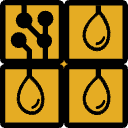

# Important Libraries and Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Input , Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.activations import relu
from tensorflow.keras import  regularizers
from tensorflow.keras import backend as K

# Load dataset
GT = pd.read_csv("C:/Users/Omid/Desktop/MDTE/Challenge 2/DT/DATASETS/gt_full.csv")

# Seperating feature and label
Target = GT[['CO','NOX']]

Feature = GT.drop(columns=['CO','NOX',],axis=1)
Feature.drop(columns=['Unnamed: 0'],axis=1, inplace=True)
X , X_test, Y, Y_test = train_test_split(Feature,Target, test_size=0.15, random_state = 42)

Y_CO = Y['CO']
Y_NOX = Y['NOX']
Y_CO_test = Y_test['CO']
Y_NOX_test = Y_test['NOX']

Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)
X_test_scaled = Scaler.transform(X_test)
minmax = MinMaxScaler()
X__MinMax_scaled = minmax.fit_transform(X)
X_test_MinMax = minmax.transform(X_test)
X_train_minmax , X_val_minmax , Y_train_minmax, Y_val_minmax = train_test_split(X__MinMax_scaled,Y,test_size=0.15,random_state=42 )

X_train_scaled , X_val_scaled , Y_train_scaled,Y_val_scaled = train_test_split(X_scaled,Y,test_size=0.15,random_state=42)
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))


In [2]:
Y_train_minmax.head()

,CO,NOX
35415,2.1579,51.563
31376,3.3855,68.097
24090,1.3495,68.896
17272,2.2269,74.501
31860,4.2067,50.799


# Model to evaluate

In [8]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

Epoch 1/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.6340 - root_mean_squared_error: 1.5963 - val_loss: 3.8817 - val_root_mean_squared_error: 1.0805
Epoch 2/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.2419 - root_mean_squared_error: 1.2531 - val_loss: 3.2129 - val_root_mean_squared_error: 0.9553
Epoch 3/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.0027 - root_mean_squared_error: 1.1587 - val_loss: 2.8920 - val_root_mean_squared_error: 0.8756
Epoch 4/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.6112 - root_mean_squared_error: 1.1222 - val_loss: 2.6758 - val_root_mean_squared_error: 0.8405
Epoch 5/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.3495 - root_mean_squared_error: 1.0780 - val_loss: 2.4949 - val_root_mean_squared_error: 0.8179
Epoch 6/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.1131 - root_mean_squared_error: 1.0531 - val_loss: 2.3802 - val_root_mean_squared_error: 0.8035
Epoch 7/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 3m

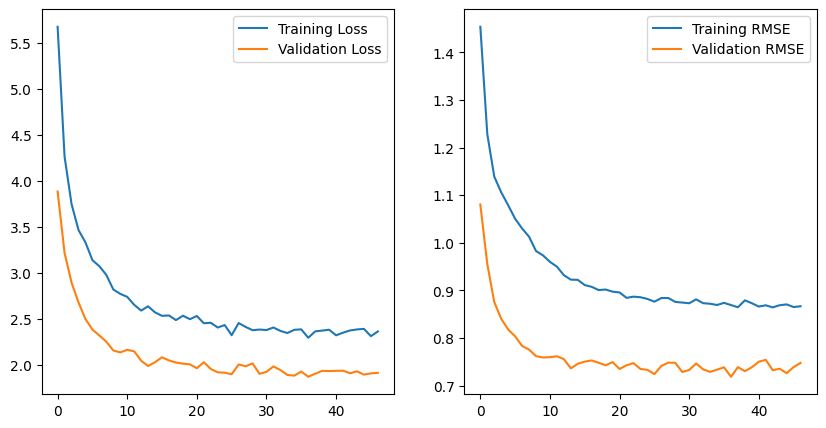

In [9]:
ANN_17 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(1)])
ANN_17.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),loss='mse',metrics=[root_mean_squared_error])
Model_18 = ANN_17.fit(X_train_minmax,Y_train_minmax['CO'],epochs=200,batch_size=32,verbose=1,validation_data=[X_val_minmax,Y_val_minmax['CO']],callbacks=[EarlyStopping(monitor='val_loss',patience=10)])
DF18 = pd.DataFrame(Model_18.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF18['loss'],label='Training Loss')
plt.plot(DF18['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF18['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF18['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import root_mean_squared_error

In [13]:
Y_pred_CO = ANN_17.predict(X_test_MinMax)
RMSE = root_mean_squared_error(Y_CO_test,Y_pred_CO)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [14]:
RMSE

1.4394505629761156

## Checking the Result

In [3]:
ANN_final  = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(1)])
ANN_final.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),loss='mse',metrics=[root_mean_squared_error])
ANN_final.fit(X__MinMax_scaled,Y_CO,epochs=200,batch_size=32,verbose=1,callbacks=[EarlyStopping(patience=10)])

Epoch 1/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 7.0743 - root_mean_squared_error: 1.6408
Epoch 2/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.1874 - root_mean_squared_error: 1.2293
Epoch 3/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.8101 - root_mean_squared_error: 1.1429
Epoch 4/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.4642 - root_mean_squared_error: 1.1001
Epoch 5/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.3009 - root_mean_squared_error: 1.0784
Epoch 6/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.2241 - root_mean_squared_error: 1.0508
Epoch 7/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.0575 - root_mean_squared_error: 1.0164
Epoch 8/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.0087 - root_mean_squared_error: 1.0021
Epoch 9/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.9573 - root_mean_squared_error: 0.9876
Epoch 10/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.7097 - root_mean_s

In [4]:
from sklearn.metrics import root_mean_squared_error

In [15]:
Y_pred_CO_final = ANN_final.predict(X_test_MinMax)
RMSE1 = root_mean_squared_error(Y_CO_test,Y_pred_CO_final)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [16]:
RMSE1

1.420349875186809

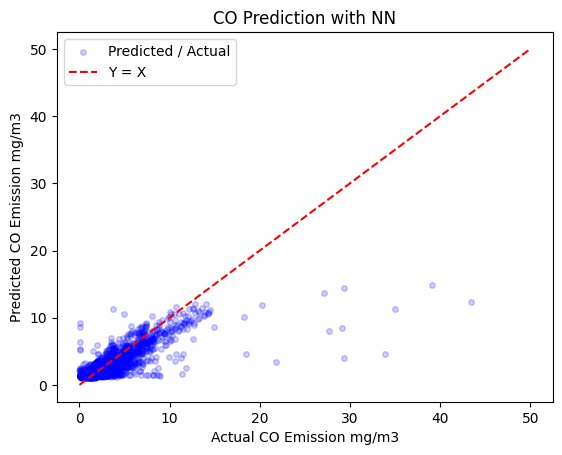

In [19]:
plt.figure()
plt.title('CO Prediction with NN')
plt.scatter(Y_CO_test,Y_pred_CO_final , s=16,alpha=0.2 , c='blue',
            label = 'Predicted / Actual')
plt.plot([0,50],[0,50],color='red',linestyle = '--',
         label = 'Y = X')
plt.legend(loc = 'upper left')
plt.xlabel('Actual CO Emission mg/m3')
plt.ylabel('Predicted CO Emission mg/m3')
plt.show()